In [0]:
# Mohamed BEN SAAD
# Elias ABDELII

In [0]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
from sklearn.decomposition import PCA

In [0]:
# CREATION JEU DE DONNEE

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


In [0]:
#  KMEANS : QUESTION 1

def K_means(X,k):
  n = X.shape[0]
  c = X.shape[1]
  mean = np.mean(X, axis = 0)
  std = np.std(X, axis = 0)
  centre = np.random.randn(k,c)*std + mean
  centre_old = np.zeros(centre.shape) 
  centre_new = np.copy(centre)
  
  clusters = np.zeros(n)
  distances = np.zeros((n,k))
  
  error = np.linalg.norm(centre_new - centre_old)
  
  while error != 0:
    for i in range(k):
        distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    
    centre_old = np.copy(centre_new)
    for i in range(k):
        centre_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centre_new - centre_old)
  plt.scatter(X[:,0], X[:,1])
  plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
  plt.show()

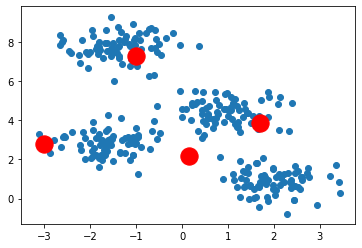

None


In [5]:
print(K_means(X,4))

In [0]:
# KMEANS : QUESTION 2 & 3

def kmeanspp(X,K):
  i=rd.randint(0,X.shape[0])
  Centroid_temp=np.array([X[i]])
  for k in range(1,K):
    D=np.array([]) 
    for x in X:
      D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
    prob=D/np.sum(D)
    cummulative_prob=np.cumsum(prob)
    r=rd.random()
    i=0
    for j,p in enumerate(cummulative_prob):
      if r<p:
        i=j
        break
    Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
  return Centroid_temp

def K_meansp(X,k):
  n = X.shape[0]
# INIT AVEC KMEANS++
  centre = kmeanspp(X,k)
  print(centre)
  centre_old = np.zeros(centre.shape) 
  centre_new = np.copy(centre)

  clusters = np.zeros(n)
  distances = np.zeros((n,k))

  error = np.linalg.norm(centre_new - centre_old)

  while error != 0:
      for i in range(k):
          distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
      clusters = np.argmin(distances, axis = 1)

      centre_old = np.copy(centre_new)
      for i in range(k):
          centre_new[i] = np.mean(X[clusters == i], axis=0)
      error = np.linalg.norm(centre_new - centre_old)
  plt.scatter(X[:,0], X[:,1])
  plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
  plt.show()

[[-1.07859101  2.20451529]
 [ 2.43934644 -0.07250997]
 [-0.92226864  8.09888579]
 [ 2.62492001  0.9501944 ]]


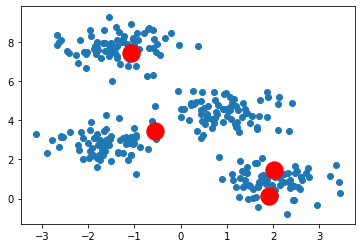

None


In [0]:
print(K_meansp(X,4))

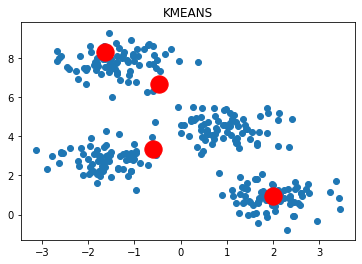

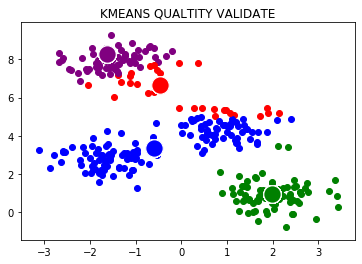

[2 0 0 0 2 2 1 1 0 3 1 3 1 0 2 1 1 2 1 1 2 2 0 1 1 1 2 1 1 1 0 0 1 0 3 3 0
 3 1 2 1 1 0 1 1 1 3 1 0 2 1 2 0 2 2 1 0 1 0 2 0 1 3 1 1 1 3 2 3 1 1 1 0 1
 1 3 1 0 2 3 2 1 2 2 3 0 2 0 0 0 1 2 3 1 1 1 2 2 0 1 3 2 0 2 1 2 2 0 0 0 1
 1 2 3 2 2 0 2 2 0 1 2 1 2 2 2 2 1 2 1 0 1 1 2 0 1 1 0 1 0 3 1 1 1 0 1 0 1
 0 0 3 1 0 1 2 1 0 1 2 0 3 1 1 2 0 1 1 0 2 1 1 3 2 0 1 0 2 2 1 1 2 1 1 1 1
 1 0 1 2 0 1 1 1 1 1 1 1 1 1 3 1 1 2 1 1 0 1 3 1 0 1 1 1 0 0 1 1 2 2 1 0 2
 2 1 2 1 1 0 0 0 1 3 1 2 1 1 2 1 3 1 2 0 2 0 0 0 3 1 1 0 0 1 2 1 1 1 1 2 2
 0 1 0 1 2 0 1 1 0 0 2 2 1 1 2 2 2 2 0 3 3 2 2 1 2 2 2 0 1 3 1 2 2 0 3 0 2
 2 1 0 1]


In [0]:
# KMEANS : QUESTION 4 & 5
def quality_validate(X,k,centre_new):
  color  = ['red', 'blue', 'green', 'purple','black','turquoise','pink','yellow','orange']
  n = len(color)
  m = centre_new.shape[1]
  for i in range(len(X)):
  #print(type(X[i]))
    for j in range(k):
      distance = np.sqrt((X[i][0]-centre_new[j][0])**2 + (X[i][1]-centre_new[j][1])**2)
      if j == 0 : 
        cm = distance
        mini = 0
      else : 
        if cm > distance : 
          cm = distance
          mini = j
    plt.title('KMEANS QUALTITY VALIDATE')
    plt.scatter(X[i,0], X[i,1],c=color[mini%n])
    for i in range(k):
      plt.scatter(centre_new[i,0], centre_new[i,1], s=300, c=color[i%n],edgecolors='white')
  plt.show()
  
def K_meanspq(X,k):
    n = X.shape[0]
    centre = kmeanspp(X,k)
    centre_old = np.zeros(centre.shape) 
    centre_new = np.copy(centre)
    
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    
    error = np.linalg.norm(centre_new - centre_old)
    
    while error != 0:
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
        clusters = np.argmin(distances, axis = 1)
        
        centre_old = np.copy(centre_new)
        for i in range(k):
            centre_new[i] = np.mean(X[clusters == i], axis=0)
        error = np.linalg.norm(centre_new - centre_old)
    plt.title('KMEANS')
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
    plt.show()
#   Qualité des clusters avec la coloration comme indices 
    quality_validate(X,k,centre_new)
    for i in range(k):
      distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
      
    clusters = np.argmin(distances, axis = 1)
    
    return clusters
    
print(K_meanspq(X,4))

In [0]:
#KMEANS : QUESTION 6 & 7
def Silhouette(X,clusters):
  return metrics.silhouette_score(X, clusters, metric='euclidean')   
    
def protocole(X,k,n):
  for i in range(n):
    c=K_meanspq(X,k)
    b=Silhouette(X,c)
    print('scrore =',b)

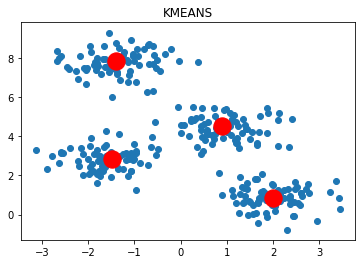

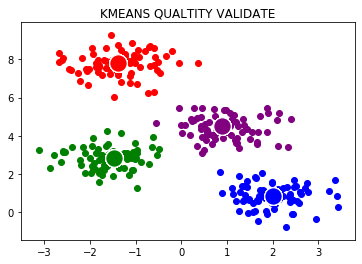

scrore = 0.661723227630209


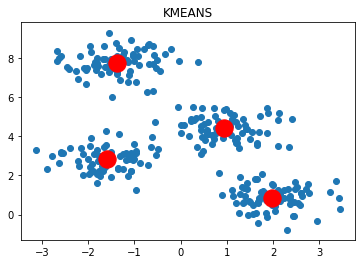

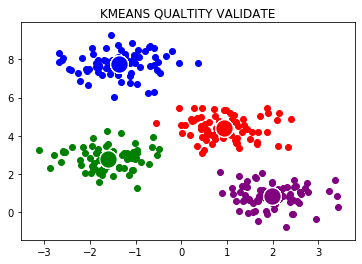

scrore = 0.6812083590661954


In [0]:
protocole(X,4,2)

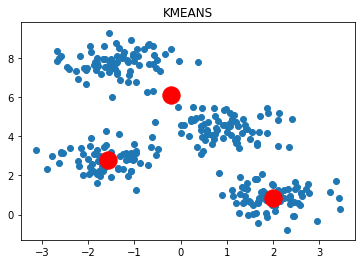

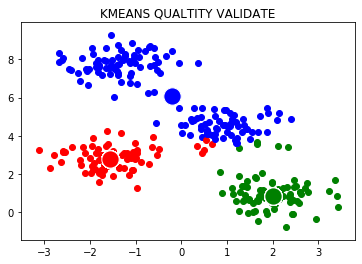

scrore = 0.5107360074714073


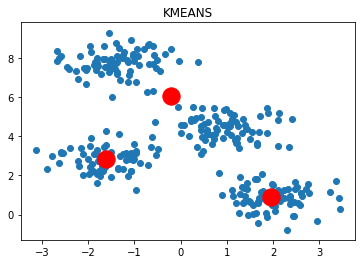

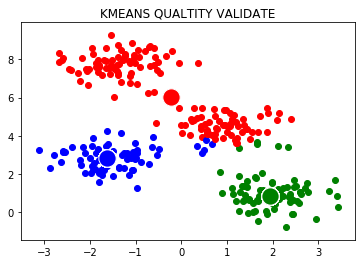

scrore = 0.5063613644937514


In [0]:
protocole(X,3,2)

0.6819938690643478


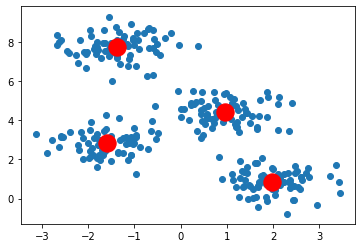

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(X)
labels = kmeans.labels_
s=metrics.silhouette_score(X, labels, metric='euclidean')
print(s)
pred_y = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

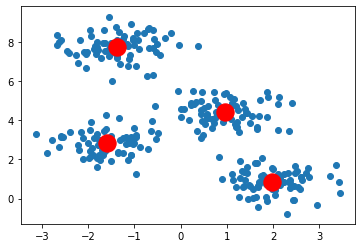

None


In [0]:
############# KMEDOID ##############
############ QUESTION 1 ##############

def K_Medoid(X,k):
    n = X.shape[0]
    c = np.random.randint(X.shape[0],size=k)
    centre = X[c]
    centre_old = np.zeros(centre.shape) 
    centre_new = np.copy(centre)
    
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    
    error = np.linalg.norm(centre_new - centre_old)
    
    while error != 0:
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
        clusters = np.argmin(distances, axis = 1)
        
        centre_old = np.copy(centre_new)
        for i in range(k):
            centre_new[i] = np.mean(X[clusters == i], axis=0)
        error = np.linalg.norm(centre_new - centre_old)
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
    plt.show()
    
print(K_Medoid(X,4))

In [0]:
############ QUESTION 2 ##############

def kmedoidspp(X,K):
  i=rd.randint(0,X.shape[0])
  Centroid_temp=np.array([X[i]])
  for k in range(1,K):
      D=np.array([]) 
      for x in X:
          D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
      prob=D/np.sum(D)
      cummulative_prob=np.cumsum(prob)
      r=rd.random()
      i=0
      for j,p in enumerate(cummulative_prob):
          if r<p:
              i=j
              break
      Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
  return Centroid_temp

In [0]:
############ QUESTION 3 ##############

def quality_validateKMD(X,k,centre_new):
  color  = ['red', 'blue', 'green', 'purple','black','turquoise','pink','yellow','orange']
  n = len(color)
  m = centre_new.shape[1]
  for i in range(len(X)):
    for j in range(k):
      distance = np.sqrt((X[i][0]-centre_new[j][0])**2 + (X[i][1]-centre_new[j][1])**2)
      if j == 0 : 
        cm = distance
        mini = 0
      else : 
        if cm > distance : 
          cm = distance
          mini = j
    plt.title('KMEDOID QUALTITY VALIDATE')
    plt.scatter(X[i,0], X[i,1],c=color[mini%n])
    for i in range(k):
      plt.scatter(centre_new[i,0], centre_new[i,1], s=300, c=color[i%n],edgecolors='white')
  plt.show()
  
def K_Medoidpq(X,k):
    n = X.shape[0]
    centre = kmedoidspp(X,k)
    centre_old = np.zeros(centre.shape) 
    centre_new = np.copy(centre)
    
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    
    error = np.linalg.norm(centre_new - centre_old)
    
    while error != 0:
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
        clusters = np.argmin(distances, axis = 1)
        
        centre_old = np.copy(centre_new)
        for i in range(k):
            centre_new[i] = np.mean(X[clusters == i], axis=0)
        error = np.linalg.norm(centre_new - centre_old)
    plt.title('KMEDOID')
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centre_new[:,0], centre_new[:,1], s=300, c='red')
    plt.show()
#   Qualité des clusters avec la coloration comme indices 
    quality_validateKMD(X,k,centre_new)
    for i in range(k):
      distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
      
    clusters = np.argmin(distances, axis = 1)
    
    return clusters

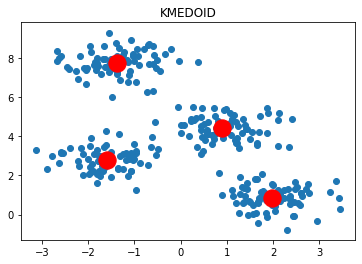

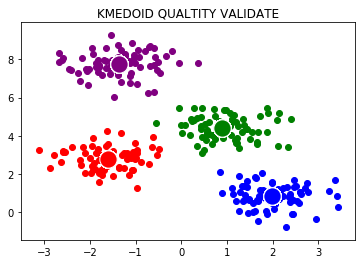

[1 3 2 3 1 1 0 2 3 3 0 3 2 3 1 2 2 1 0 0 1 1 2 0 0 2 1 2 0 2 3 3 2 3 3 3 3
 3 0 1 2 0 2 2 0 0 3 0 3 1 0 1 3 1 1 0 3 0 3 1 3 2 3 0 0 0 3 1 3 0 2 0 3 0
 0 3 0 2 1 3 1 2 1 1 3 2 1 2 3 3 2 1 3 0 0 2 1 1 2 0 3 1 3 1 2 1 1 2 3 2 0
 0 1 3 1 2 3 1 1 2 0 1 0 1 1 1 1 0 1 0 3 0 0 1 3 0 0 3 2 3 3 0 2 0 2 0 3 2
 3 3 3 2 3 2 1 0 3 0 1 2 3 2 2 1 2 0 0 2 1 2 2 3 1 2 2 3 1 1 2 0 1 2 0 0 2
 2 2 2 1 3 2 0 2 2 0 0 0 2 0 3 2 0 1 0 2 3 0 3 2 3 2 0 2 2 3 0 0 1 1 2 3 1
 1 0 1 0 2 3 3 2 2 3 2 1 0 2 1 0 3 0 1 2 1 3 3 3 3 0 0 3 2 0 1 2 0 0 2 1 1
 3 2 2 0 1 3 0 2 3 2 1 1 0 0 2 1 1 1 2 3 3 1 1 2 1 1 1 3 0 3 2 1 1 3 3 3 1
 1 2 3 0]


In [0]:
############ QUESTION 4 ##############    
print(K_Medoidpq(X,4))

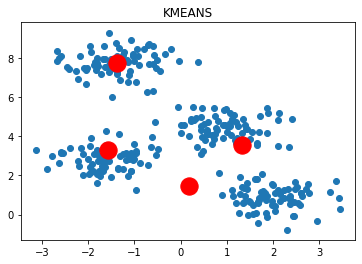

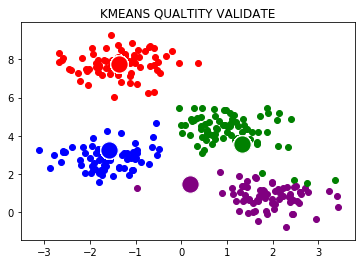

scrore = 0.3231467952376513


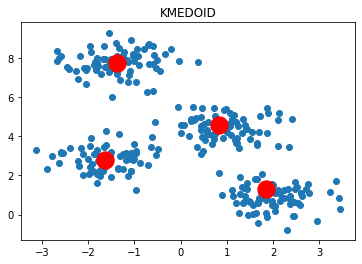

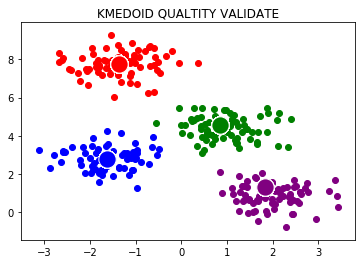

scrore = 0.6138888413259603


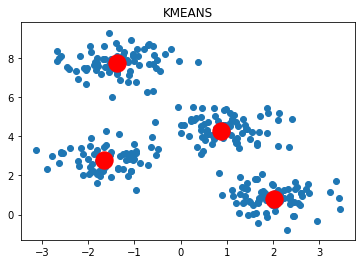

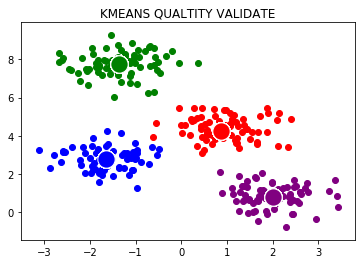

scrore = 0.6575182128960956


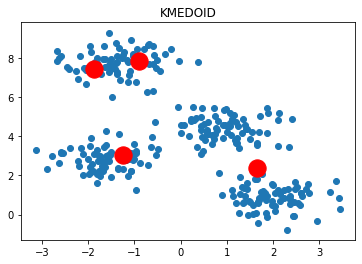

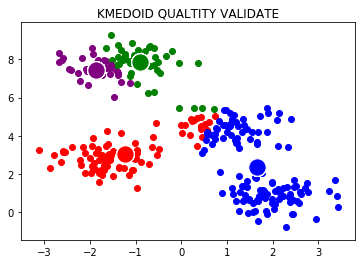

scrore = 0.37641187943928034


In [0]:
def protocole2(X,k,n):
  for i in range(n):
    c = K_meanspq(X,k)
    b=Silhouette(X,c)
    print('scrore =',b)
    m = K_Medoidpq(X,k)
    n=Silhouette(X,m)
    print('scrore =',n)

protocole2(X,4,2)


In [0]:
#
#     On peut remarquer que le K_MEDOID est un peu plus stable que le K_MEANS
#     Cependant on peu dire que les deux algorithme sont vraiment très proche
#     Ils ont une initialisation des centroids qui divergent legerement.
#
#     Le fait que le K_MEDOID s'initialise a partir d'individus de nos données et
#     que le K_MEANS s'initialise a partir d'un point random appartenant ou non a nos
#     données donne une stabilité différente.
#     
#     Le KMEANS++ palis a ce probleme de stabilité bien que notre fonction créer n'est pas 
#     aussi performante que le Kmeans++ de la library sklearn
#     
#     Sur IRIS DATA le kmeans ou kmedoid ne donneront pas de bon resultat
#